# Exploratory Data Analysis

In [1]:
#import relevent packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

### 1. Load Data Into DataFrames from Google Drive

In [2]:
#specify file paths
id_113 = '1D78-xfSTlTM-zfJEmsEQVnl5vigMaXIr'
id_114 = '1NhGvzIQKDUrnYqSgUkZ-1xt54P35A3Fm'
id_115 = '1U4LzcXPo446HvyQlQaKNzJLwoyTyxDo3'

download = 'https://drive.google.com/uc?export=download&id='

path_113 = download + id_113
path_114 = download + id_114
path_115 = download + id_115

raw_113 = StringIO(requests.get(path_113).text)
raw_114 = StringIO(requests.get(path_114).text)
raw_115 = StringIO(requests.get(path_115).text)

In [3]:
#load datasets
data113 = pd.read_csv(raw_113)
data114 = pd.read_csv(raw_114)
data115 = pd.read_csv(raw_115)

### 2. Examine Data Properties

In [4]:
#get number of observations and features
print(data113.shape)
data113.head()

(4093, 38)


,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,subcommittee_codes_y,subcommittee_side,subcommittee_rank_in_party,id,gender,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,hr5893-113,hr5893,To restore the First Amendment Rights of Photo...,Ansel Adams Act,Rep.,S000937,Steve Stockman,R,2015-01-02,False,...,[],[],[],S000937,M,NaN,2,5.90,85.58,14.34
1,hr5892-113,hr5892,To protect cryptocurrencies.,Online Market Protection Act of 2014,Rep.,S000937,Steve Stockman,R,2015-01-02,False,...,[],[],[],S000937,M,NaN,2,5.90,85.58,14.34
2,hr5891-113,hr5891,To increase the standards of school lunch prog...,Michelle Obama Nutritional Act,Rep.,S000937,Steve Stockman,R,2015-01-02,False,...,[],[],[],S000937,M,NaN,2,5.90,85.58,14.34
3,hr5890-113,hr5890,To conduct a study to ensure that enhanced com...,No Missing Planes Act,Rep.,J000032,Sheila Jackson Lee,D,2015-01-02,False,...,[],[],[],J000032,F,NaN,20,7.48,93.85,6.06
4,hr5889-113,hr5889,"To revise the Uniform Crime Reports, and the N...",Justifiable Homicide Accuracy in Reporting Act...,Rep.,J000032,Sheila Jackson Lee,D,2015-01-02,False,...,[],[],[],J000032,F,NaN,20,7.48,93.85,6.06


In [5]:
#looking for null values and data types
data113.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4093 entries, 0 to 4092
Data columns (total 38 columns):
bill_id                       4093 non-null object
bill_slug                     4093 non-null object
title                         4093 non-null object
short_title                   4093 non-null object
sponsor_title                 4093 non-null object
sponsor_id                    4093 non-null object
sponsor_name                  4093 non-null object
sponsor_party                 4093 non-null object
introduced_date               4093 non-null object
active                        4093 non-null bool
last_vote                     190 non-null object
house_passage                 339 non-null object
senate_passage                130 non-null object
enacted                       140 non-null object
vetoed                        0 non-null float64
cosponsors                    4093 non-null int64
cosponsors_by_party           4093 non-null object
committee_codes_x             4093 

In [6]:
#look at distributions, check for outliers, 999 codes, or errors
data113.describe().T

,count,mean,std,min,25%,50%,75%,max
vetoed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cosponsors,4093.0,14.199120,30.388470,0.00,1.00,4.00,14.00,378.00
congress,4093.0,113.000000,0.000000,113.00,113.00,113.00,113.00,113.00
leadership_role,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniority,4093.0,10.902516,9.614771,1.00,4.00,8.00,16.00,60.00
missed_votes_pct,4093.0,3.542297,4.441136,0.00,1.16,2.41,4.57,57.97
votes_with_party_pct,4093.0,91.632008,11.582944,0.00,91.68,93.86,95.45,98.52
votes_against_party_pct,4037.0,7.012130,4.231320,1.48,4.44,6.01,8.21,39.03


In [7]:
#repeat the steps for data114
print(data114.shape)
data114.head()

(6526, 38)


,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,subcommittee_codes_y,subcommittee_side,subcommittee_rank_in_party,id,gender,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,hr6536-114,hr6536,To prohibit the employment of school bus drive...,No School Bus Drivers with DUIs Act of 2016,Rep.,M001188,Grace Meng,D,2016-12-30,False,...,[],[],[],M001188,F,NaN,4,4.55,97.36,2.56
1,hr6535-114,hr6535,To require the President to obtain written app...,Nuclear Sanity Act,Rep.,G000556,Alan Grayson,D,2016-12-27,False,...,[],[],[],G000556,M,NaN,4,4.08,94.76,5.08
2,hr6534-114,hr6534,To require the creation and maintenance of a M...,MadeInAmerica.gov Act,Rep.,M001188,Grace Meng,D,2016-12-20,False,...,[],[],[],M001188,F,NaN,4,4.55,97.36,2.56
3,hr6531-114,hr6531,To authorize the programs of the National Aero...,National Aeronautics and Space Administration ...,Rep.,S000583,Lamar Smith,R,2016-12-20,False,...,[],[],[],S000583,M,NaN,30,1.96,97.52,2.40
4,hr6532-114,hr6532,To provide for the adjustment of status of cer...,Liberian Refugee Immigration Fairness Act of 2016,Rep.,E000288,Keith Ellison,D,2016-12-20,False,...,[],[],[],E000288,M,NaN,10,4.53,96.73,3.11


In [8]:
data114.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6526 entries, 0 to 6525
Data columns (total 38 columns):
bill_id                       6526 non-null object
bill_slug                     6526 non-null object
title                         6526 non-null object
short_title                   6526 non-null object
sponsor_title                 6526 non-null object
sponsor_id                    6526 non-null object
sponsor_name                  6526 non-null object
sponsor_party                 6526 non-null object
introduced_date               6526 non-null object
active                        6526 non-null bool
last_vote                     330 non-null object
house_passage                 775 non-null object
senate_passage                218 non-null object
enacted                       219 non-null object
vetoed                        2 non-null object
cosponsors                    6526 non-null int64
cosponsors_by_party           6526 non-null object
committee_codes_x             6526 n

In [9]:
data114.describe().T

,count,mean,std,min,25%,50%,75%,max
cosponsors,6526.0,16.653080,34.340434,0.00,1.00,4.00,16.00,335.00
congress,6526.0,114.000000,0.000000,114.00,114.00,114.00,114.00,114.00
seniority,6526.0,11.416181,9.429550,2.00,4.00,8.00,16.00,52.00
missed_votes_pct,6418.0,3.711812,4.225542,0.00,1.21,2.64,4.60,97.24
votes_with_party_pct,6418.0,94.702367,3.582785,65.10,93.71,95.65,96.78,98.51
votes_against_party_pct,6418.0,5.215569,3.583202,1.41,3.12,4.27,6.27,34.83


In [10]:
#repeat the steps for data115
print(data115.shape)
data115.head()

(7394, 38)


,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,subcommittee_codes_y,subcommittee_side,subcommittee_rank_in_party,id,gender,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,hr7401-115,hr7401,To modify provisions of law relating to refuge...,Strengthening Refugee Resettlement Act,Rep.,E000288,Keith Ellison,D,2019-01-02,False,...,"['HSBA09', 'HSBA15', 'HSBA16']","['minority', 'minority', 'minority']","[2, 7, 6]",E000288,M,NaN,12,17.34,94.66,5.34
1,hr7400-115,hr7400,Making continuing appropriations for the Coast...,Making continuing appropriations for the Coast...,Rep.,W000826,Susan Wild,D,2019-01-02,False,...,[],[],[],W000826,F,NaN,2,12.66,100.00,0.00
2,hr7399-115,hr7399,To amend the Federal Election Campaign Act of ...,Inaugural Fund Integrity Act,Rep.,S001205,Mary Gay Scanlon,D,2018-12-27,False,...,[],[],[],S001205,F,NaN,2,1.19,98.78,1.22
3,hr7397-115,hr7397,To provide further additional continuing appro...,To provide further additional continuing appro...,Rep.,H000874,Steny H. Hoyer,D,2018-12-22,False,...,[],[],[],H000874,M,Minority Whip,38,5.04,98.39,1.61
4,hr7398-115,hr7398,To prohibit the operation of an exercise facil...,SPA Act,Rep.,F000454,Bill Foster,D,2018-12-22,False,...,"['HSBA01', 'HSBA16', 'HSBA20', 'HSSY16', 'HSSY...","['minority', 'minority', 'minority', 'minority...","[4, 7, 3, 8, 7]",F000454,M,NaN,6,2.15,96.10,3.90


In [11]:
data115.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 38 columns):
bill_id                       7394 non-null object
bill_slug                     7394 non-null object
title                         7394 non-null object
short_title                   7394 non-null object
sponsor_title                 7394 non-null object
sponsor_id                    7394 non-null object
sponsor_name                  7394 non-null object
sponsor_party                 7394 non-null object
introduced_date               7394 non-null object
active                        7394 non-null bool
last_vote                     356 non-null object
house_passage                 998 non-null object
senate_passage                288 non-null object
enacted                       200 non-null object
vetoed                        0 non-null float64
cosponsors                    7394 non-null int64
cosponsors_by_party           7394 non-null object
committee_codes_x             7394 

In [12]:
data115.describe().T

,count,mean,std,min,25%,50%,75%,max
vetoed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cosponsors,7394.0,15.429402,34.040479,0.00,1.00,4.00,14.00,385.00
congress,7394.0,115.000000,0.000000,115.00,115.00,115.00,115.00,115.00
seniority,7394.0,11.787666,9.634513,2.00,6.00,8.00,16.00,54.00
missed_votes_pct,7243.0,4.200231,4.648869,0.00,1.24,2.71,5.86,97.69
votes_with_party_pct,7243.0,95.246442,3.487360,61.27,94.40,96.30,97.21,100.00
votes_against_party_pct,7243.0,4.754163,3.486904,0.00,2.79,3.70,5.60,38.73


### 3. Explore Data Relationships

In [13]:
#merge datasets
data = pd.concat([data113, data114, data115])
print(data.shape)
data.head()

(18013, 38)


,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,subcommittee_codes_y,subcommittee_side,subcommittee_rank_in_party,id,gender,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,hr5893-113,hr5893,To restore the First Amendment Rights of Photo...,Ansel Adams Act,Rep.,S000937,Steve Stockman,R,2015-01-02,False,...,[],[],[],S000937,M,NaN,2,5.90,85.58,14.34
1,hr5892-113,hr5892,To protect cryptocurrencies.,Online Market Protection Act of 2014,Rep.,S000937,Steve Stockman,R,2015-01-02,False,...,[],[],[],S000937,M,NaN,2,5.90,85.58,14.34
2,hr5891-113,hr5891,To increase the standards of school lunch prog...,Michelle Obama Nutritional Act,Rep.,S000937,Steve Stockman,R,2015-01-02,False,...,[],[],[],S000937,M,NaN,2,5.90,85.58,14.34
3,hr5890-113,hr5890,To conduct a study to ensure that enhanced com...,No Missing Planes Act,Rep.,J000032,Sheila Jackson Lee,D,2015-01-02,False,...,[],[],[],J000032,F,NaN,20,7.48,93.85,6.06
4,hr5889-113,hr5889,"To revise the Uniform Crime Reports, and the N...",Justifiable Homicide Accuracy in Reporting Act...,Rep.,J000032,Sheila Jackson Lee,D,2015-01-02,False,...,[],[],[],J000032,F,NaN,20,7.48,93.85,6.06


We have just over 18,000 observations (bills) from the 113th, 114th, and 115th congresses. Each observation should have 38 features but several columns appear to be almost entirely empty

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18013 entries, 0 to 7393
Data columns (total 38 columns):
bill_id                       18013 non-null object
bill_slug                     18013 non-null object
title                         18013 non-null object
short_title                   18013 non-null object
sponsor_title                 18013 non-null object
sponsor_id                    18013 non-null object
sponsor_name                  18013 non-null object
sponsor_party                 18013 non-null object
introduced_date               18013 non-null object
active                        18013 non-null bool
last_vote                     876 non-null object
house_passage                 2112 non-null object
senate_passage                636 non-null object
enacted                       559 non-null object
vetoed                        2 non-null object
cosponsors                    18013 non-null int64
cosponsors_by_party           18013 non-null object
committee_codes_x     

We can see that of the 18,013 house bills introduced over these 3 congresses, only about 2,000 passed the house. Roughly 600 of those bills were also passed by the senate and 550 were enacted.

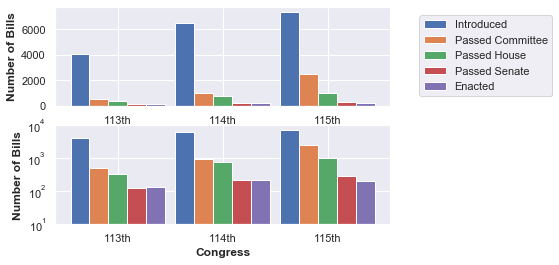

In [15]:
#We will now plot the number of bills which attain each stage of passage to get an idea of the strictness of the funnel
sns.set()
introduced = data[['bill_id', 'congress']].groupby(['congress']).count()
active = data[['active', 'congress']].groupby(['congress']).sum()
passed_house = data[['house_passage', 'congress']].groupby(['congress']).count()
passed_senate = data[['senate_passage', 'congress']].groupby(['congress']).count()
enacted = data[['enacted', 'congress']].groupby(['congress']).count()

#setting variable values
x = np.array([1,2,3])
i = introduced['bill_id']
j = active['active']
k = passed_house['house_passage']
l = passed_senate['senate_passage']
m = enacted['enacted']

#plotting and labeling
ax = plt.subplot(211)
w = 0.18
ax.bar(x-2*w, i, width=w, align='center', label = 'Introduced')
ax.bar(x-w, j, width=w, align='center', label = 'Passed Committee')
ax.bar(x, k, width=w, align='center', label = 'Passed House')
ax.bar(x+w, l, width=w, align='center', label = 'Passed Senate')
ax.bar(x+2*w, m, width=w, align='center', label = 'Enacted')

plt.xlabel('Congress', fontweight = 'bold')
plt.xticks(x, ['113th', '114th', '115th'])
plt.ylabel('Number of Bills', fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.5, .97))

ax1 = plt.subplot(212)
w = 0.18
ax1.bar(x-2*w, i, width=w, align='center', label = 'Introduced')
ax1.bar(x-w, j, width=w, align='center', label = 'Passed Committee')
ax1.bar(x, k, width=w, align='center', label = 'Passed House')
ax1.bar(x+w, l, width=w, align='center', label = 'Passed Senate')
ax1.bar(x+2*w, m, width=w, align='center', label = 'Enacted')

plt.xlabel('Congress', fontweight = 'bold')
plt.xticks(x, ['113th', '114th', '115th'])
plt.ylabel('Number of Bills', fontweight = 'bold')
plt.yscale('log')
plt.yticks([10,100,1000,10000])
plt.show()

In [16]:
fractions = pd.DataFrame({'Percent Passed Committee': np.round(100*active.active / introduced.bill_id, 2),
                         'Percent Passed House': np.round(100*passed_house.house_passage / introduced.bill_id, 2),
                         'Percent Passed Senate': np.round(100*passed_senate.senate_passage / introduced.bill_id, 2),
                         'Percent Enacted': np.round(100*enacted.enacted / introduced.bill_id, 2)})
fractions

,Percent Passed Committee,Percent Passed House,Percent Passed Senate,Percent Enacted
congress,,,,
113,12.88,8.28,3.18,3.42
114,15.03,11.88,3.34,3.36
115,33.58,13.50,3.90,2.70


In [17]:
markov_probabilities = pd.DataFrame({'Committee Passage': 
                                     fractions['Percent Passed Committee']/100,
                                     'House Passage Given Committee Passage': 
                                     fractions['Percent Passed House']/fractions['Percent Passed Committee'],
                                     'Senate Passage Given House Passage': 
                                     fractions['Percent Passed Senate']/fractions['Percent Passed House'],
                                     'Enactment Given Senate Passage': 
                                     fractions['Percent Enacted']/fractions['Percent Passed Senate']
                                    })
markov_probabilities

,Committee Passage,House Passage Given Committee Passage,Senate Passage Given House Passage,Enactment Given Senate Passage
congress,,,,
113,0.1288,0.642857,0.384058,1.075472
114,0.1503,0.790419,0.281145,1.005988
115,0.3358,0.402025,0.288889,0.692308


The top graph above displays a linear scale and reveals the vanishingly small number of bills which are enacted each year compared to the thousands of bills introduced (note: this data is for house bills only). The second graph uses a logarithmic scale and shows that the number of bills which proceed to the next stage of passage appears to be roughly proportional to the number of bills in the proceeding stage. 

The following two DataFrames represents attempts to confirm this intuition. The top DataFrame lists the percent of introduced bills which pass each successive stage of the legislative process while the second DataFrame gives the probability of a bill reaching the next stage given that it has attained the previous. This allows us to confirm that, of the thousands of bills introduced each congress, roughly 3% are enacted into law. While this proportion appears relatively stable accross congresses, the fraction of bills passing each stage seems to vary more widely.

Lastly, we see that there are some bills which have been enacted despite not being passed in the senate. This defies our assumption that bills must proceed along a single path. Therefore, we will examine the data to explore this inconsistency.

In [18]:
#check if any inactive (died in committee) bills passed the house
print('Number of Dead Bills which Passed the House:')
hnc = data.house_passage.notnull() & (data.active == False) #hnc: house, no committee
print(hnc.sum())

#check if any house bills passed the senate and not the house
print('Number of House Bills which Passed Senate Only:')
snh = data.senate_passage.notnull() & data.house_passage.isnull() #snh: senate, no house
print(snh.sum())

#check if any bills were enacted without passing the senate
print('Number of House Bills enacted without Senate Passage')
ens = data.enacted.notnull() & data.senate_passage.isnull() #ens: enacted, no senate
print(ens.sum())

#check if any bills were enacted without passing the house or senate
print('Number of House Bills enacted without Congress Passage')
enc = ens & data.house_passage.isnull() #ens: enacted, no congress
print(enc.sum())

Number of Dead Bills which Passed the House:
0
Number of House Bills which Passed Senate Only:
17
Number of House Bills enacted without Senate Passage
19
Number of House Bills enacted without Congress Passage
2


The number of exceptions appears to be relatively small considering the size of the dataset. Nevertheless, we will take a closer look to determine whether these bills need to be thrown out, or our assumptions modified.

In [19]:
df_snh = data[snh]
df_snh.head(17)

,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,subcommittee_codes_y,subcommittee_side,subcommittee_rank_in_party,id,gender,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
1265,hr4631-113,hr4631,To reauthorize certain provisions of the Publi...,"Autism Collaboration, Accountability, Research...",Rep.,S000522,Christopher H. Smith,R,2014-05-09,True,...,[],[],[],S000522,M,NaN,34,2.49,90.25,9.67
1697,hr4193-113,hr4193,"To amend title 5, United States Code, to chang...",Smart Savings Act,Rep.,I000056,Darrell Issa,R,2014-03-11,True,...,[],[],[],I000056,M,NaN,14,1.08,96.04,3.87
1698,hr4192-113,hr4192,"To amend the Act entitled ""An Act to regulate ...","To amend the Act entitled ""An Act to regulate ...",Rep.,I000056,Darrell Issa,R,2014-03-11,True,...,[],[],[],I000056,M,NaN,14,1.08,96.04,3.87
1866,hr4032-113,hr4032,To exempt from Lacey Act Amendments of 1981 ce...,North Texas Invasive Species Barrier Act of 2014,Rep.,H000067,Ralph M. Hall,R,2014-02-11,True,...,[],[],[],H000067,M,NaN,34,7.39,94.32,5.59
1870,hr4028-113,hr4028,To amend the International Religious Freedom A...,To amend the International Religious Freedom A...,Rep.,M001188,Grace Meng,D,2014-02-10,True,...,[],[],[],M001188,F,NaN,2,5.98,95.11,4.80
2351,hr3548-113,hr3548,To amend title XII of the Public Health Servic...,Improving Trauma Care Act of 2014,Rep.,J000292,Bill Johnson,R,2013-11-20,True,...,[],[],[],J000292,M,NaN,4,0.08,93.91,6.01
2431,hr3468-113,hr3468,To amend the Federal Credit Union Act to exten...,Credit Union Share Insurance Fund Parity Act,Rep.,R000487,Edward Royce,R,2013-11-13,True,...,[],[],[],R000487,M,NaN,22,2.08,95.83,4.09
2529,hr3370-113,hr3370,To delay the implementation of certain provisi...,Homeowner Flood Insurance Affordability Act of...,Rep.,G000569,Mike Grimm,R,2013-10-29,True,...,[],[],[],G000569,M,NaN,4,7.23,89.04,10.87
2790,hr3110-113,hr3110,To allow for the harvest of gull eggs by the H...,Huna Tlingit Traditional Gull Egg Use Act,Rep.,Y000033,Don Young,R,2013-09-17,True,...,[],[],[],Y000033,M,NaN,42,7.89,88.86,11.05
2807,hr3092-113,hr3092,To amend the Missing Children's Assistance Act...,"E. Clay Shaw, Jr. Missing Children's Assistanc...",Rep.,G000558,Brett Guthrie,R,2013-09-12,True,...,[],[],[],G000558,M,NaN,6,1.08,96.63,3.29


We see above that all bills which passed in only the senate are from the 113th congress, indicating that this is a rather anomolous occurance. This is supported by the fact that the 113th congress had a Republican led House and a Democrat led senate where the margins in each chamber were extremely thin, meaning that only a few defections from either side could shift the outcome of a vote. On the other hand, these observations could merely represent missing data.

In [20]:
df_ens = data[ens]
df_ens.head(19)

,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,subcommittee_codes_y,subcommittee_side,subcommittee_rank_in_party,id,gender,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
166,hr5728-113,hr5728,To amend the Communications Act of 1934 and ti...,STELA Reauthorization Act of 2014,Rep.,U000031,Fred Upton,R,2014-11-18,True,...,[],[],[],U000031,M,NaN,28,1.66,93.98,5.94
194,hr5705-113,hr5705,To modify certain provisions relating to the P...,Propane Education and Research Enhancement Act...,Rep.,L000566,Robert E. Latta,R,2014-11-13,True,...,[],[],[],L000566,M,NaN,8,0.25,97.58,2.34
972,hr4924-113,hr4924,To direct the Secretary of the Interior to ent...,Bill Williams River Water Rights Settlement Ac...,Rep.,G000565,Paul Gosar,R,2014-06-20,True,...,[],[],[],G000565,M,NaN,4,13.46,92.11,7.80
1622,hr4275-113,hr4275,To amend the Employee Retirement Income Securi...,Cooperative and Small Employer Charity Pension...,Rep.,B001284,Susan Brooks,R,2014-03-18,True,...,[],[],[],B001284,F,NaN,2,0.50,95.98,3.94
2128,hr3771-113,hr3771,To accelerate the income tax benefits for char...,Philippines Charitable Giving Assistance Act,Rep.,S001193,Eric Swalwell,D,2013-12-12,True,...,[],[],[],S001193,M,NaN,2,0.50,93.52,6.40
2241,hr3658-113,hr3658,"To grant the Congressional Gold Medal, collect...",Monuments Men Recognition Act of 2014,Rep.,G000377,Kay Granger,R,2013-12-05,True,...,[],[],[],G000377,F,NaN,18,4.90,96.23,3.68
2273,hr3626-113,hr3626,To extend the Undetectable Firearms Act of 198...,To extend the Undetectable Firearms Act of 198...,Rep.,C000556,Howard Coble,R,2013-12-02,True,...,[],[],[],C000556,M,NaN,30,14.53,96.48,3.42
2441,hr3458-113,hr3458,To treat payments by charitable organizations ...,Fallen Firefighters Assistance Tax Clarificati...,Rep.,S000480,Louise M. Slaughter,D,2013-11-12,True,...,[],[],[],S000480,F,NaN,28,8.22,91.80,8.11
2666,hr3233-113,hr3233,To extend the period during which Iraqis who w...,To extend the period during which Iraqis who w...,Rep.,B000574,Earl Blumenauer,D,2013-10-02,True,...,[],[],[],B000574,M,NaN,20,4.93,94.24,5.76
2690,hr3210-113,hr3210,Making continuing appropriations for military ...,Pay Our Military Act,Rep.,C001077,Mike Coffman,R,2013-09-28,True,...,[],[],[],C001077,M,NaN,6,0.75,92.18,7.73


11 of the 19 observations come from the 113th congress, 5 from the 114th and 3 from the 115th. Since most of the missing data points are from the 113th congress, as before, this reinforces the explanation that these observations are the result of missing data rather than a violation of congressional procedure. Just to be safe, we will examine the two bills which were enacted without any recorded house or senate passage in more detail.

In [21]:
df_enc = data[enc]
df_enc.head()

,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,subcommittee_codes_y,subcommittee_side,subcommittee_rank_in_party,id,gender,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
2128,hr3771-113,hr3771,To accelerate the income tax benefits for char...,Philippines Charitable Giving Assistance Act,Rep.,S001193,Eric Swalwell,D,2013-12-12,True,...,[],[],[],S001193,M,NaN,2,0.50,93.52,6.40
2961,hr2939-113,hr2939,To award the Congressional Gold Medal to Shimo...,To award the Congressional Gold Medal to Shimo...,Rep.,K000379,Joseph P. Kennedy III,D,2013-08-01,True,...,[],[],[],K000379,M,NaN,2,1.66,96.00,3.91


As suspected, both of these observations come from the 113th congress. A quick search on GovTrack using the bill IDs reveals that the first bill passed the house on March 24th, 2014 and was passed by the senate the following day. The second bill follows a similar story. Seeing as there are so few of these observations, and they are the result of missing data rather than anomolous occurences, we can delete them and feel comfortable about our original assumptions.

Next we will test our assumptions about the passage and enactment rates of bills

In [22]:
#getting historical data for the last 20 congresses (96th - 115th)
introduced = np.array([8455, 7457, 6442, 5743, 5585, 5977, 6212, 5310, 4344, 4874, 5681, 5767,
              5431, 6436, 7340, 6570, 6729, 5893, 6536, 7401])
active = np.array([799, 2498, 2578, 2414, 2420, 2429, 2307, 1851, 1361, 1228, 1317, 1168, 1217, 
          1031, 1181, 864, 814, 849, 1017, 1293])
passed_house = np.array([713, 477, 616, 551, 645, 591, 614, 524, 490, 530, 708, 566, 618, 616, 943, 
                722, 491, 581, 773, 998])
passed_senate = np.array([447, 289, 337, 303, 406, 343, 355, 278, 259, 258, 405, 306, 350, 328, 325, 
                261, 202, 210, 223, 291])
enacted = np.array([422, 267, 305, 256, 362, 294, 305, 259, 233, 237, 368, 288, 334, 316, 308, 254,
          199, 209, 216, 284])
for ls in [introduced, active, passed_house, passed_senate, enacted]:
    assert(len(ls) == 20)

In [23]:
#calculate probabilities of advancing to each step
introduced_enacted = np.round(100*enacted / introduced, 2)
introduced_active = np.round(100*active / introduced, 2)
active_house = np.round(100*passed_house / active, 2)
house_senate = np.round(100*passed_senate / passed_house, 2)
senate_enacted = np.round(100*enacted / passed_senate, 2)

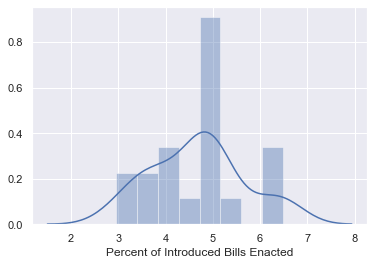

Mean:  4.671


In [24]:
sns.distplot(introduced_enacted, kde = True, bins = 8)
plt.xlabel('Percent of Introduced Bills Enacted')
plt.show()
print('Mean: ', introduced_enacted.mean())

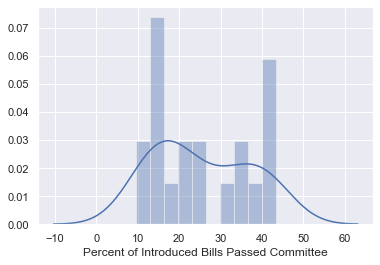

Mean:  25.4065


In [25]:
sns.distplot(introduced_active, kde = True, bins = 10)
plt.xlabel('Percent of Introduced Bills Passed Committee')
plt.show()
print('Mean: ', introduced_active.mean())

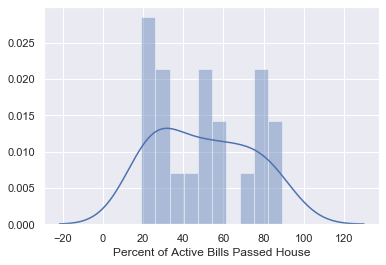

Mean:  49.911


In [26]:
sns.distplot(active_house, kde = True, bins = 10)
plt.xlabel('Percent of Active Bills Passed House')
plt.show()
print('Mean: ', active_house.mean())

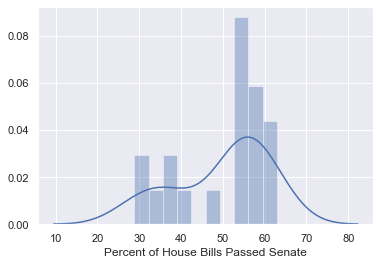

Mean:  49.671


In [27]:
sns.distplot(house_senate, kde = True, bins = 10)
plt.xlabel('Percent of House Bills Passed Senate')
plt.show()
print('Mean: ', house_senate.mean())

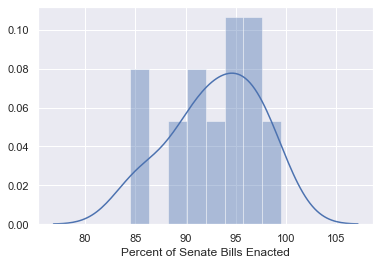

Mean:  92.94449999999998


In [28]:
sns.distplot(senate_enacted, kde = True, bins = 8)
plt.xlabel('Percent of Senate Bills Enacted')
plt.show()
print('Mean: ', senate_enacted.mean())

Due to the limited number od data points, it is difficult to make any definitive conclusions about the distribution plots above. However, based on the evidence, none of them appear to be drawn from any recognizable distribution, although the first plot (percentage of introduced bills enacted) has the strong central tendency of a normal distribution. The remaining plots display high levels of variance which make them difficult to interpret. The exception to this is the last plot (rate of enactment given senate passage) which shows relatively little spread and concsistent values and could suggest a uniform random distribution. 

Overall, these plots indicate that the rate of enactment, as well as the probability of proceeding from one stage to the next, is highly variable and influenced by many factors. The success of our model will depend upon how many of these factors we can find within our data. 

### 4. Date Time Analysis

In [29]:
#convert relevent columns to DateTime
data['enacted'] = pd.to_datetime(data['enacted'])

In [30]:
data['introduced_date'] = pd.to_datetime(data['introduced_date'])

In [31]:
data['house_passage'] = pd.to_datetime(data['house_passage'])

In [32]:
data['senate_passage'] = pd.to_datetime(data['senate_passage'])

In [33]:
data['latest_major_action_date'] = pd.to_datetime(data['latest_major_action_date'])

In [34]:
#create time delta features
data['time_delta_total'] = data['enacted'] - data['introduced_date']

In [35]:
data['time_delta_1'] = data['house_passage'] - data['introduced_date']

In [36]:
data['time_delta_2'] = data['senate_passage'] - data['house_passage']

In [37]:
data['time_delta_3'] = data['enacted'] - data['senate_passage']

In [38]:
data['lifespan'] = data['latest_major_action_date'] - data['introduced_date']

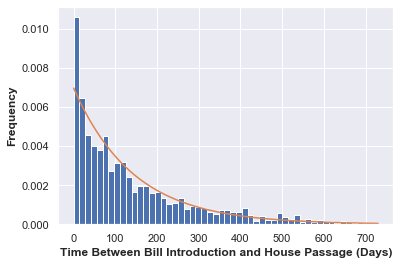

In [39]:
time_delta = (data.time_delta_1[data.time_delta_1.notna()] / np.timedelta64(1, 'D')).astype(int)
tau = 1/time_delta.mean()
time_delta.hist(bins = 50, density = True)
x = np.linspace(0,730, 730)
plt.plot(x, tau*np.exp(-tau*x))
plt.xlabel('Time Between Bill Introduction and House Passage (Days)', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.show()

The data above appears to follow an exponential distribution. If the time deltas between introduction and house passage are indeed drawn from an exponential distribution this indicates that, of the bills which are going to pass the house, the bill has a fixed probability of being passed each day following its inception.

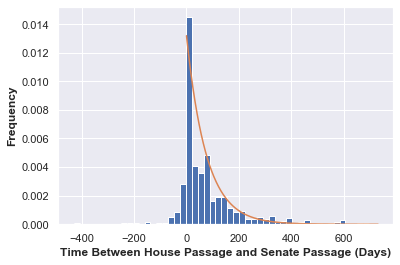

In [40]:
time_delta = (data.time_delta_2[data.time_delta_2.notna()] / np.timedelta64(1, 'D')).astype(int)
tau = 1/time_delta.mean()
time_delta.hist(bins = 50, density = True)
x = np.linspace(0,730, 730)
plt.plot(x, tau*np.exp(-tau*x))
plt.xlabel('Time Between House Passage and Senate Passage (Days)', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.show()

While the figure above also appears to follow an exponential distribution, the existence of negative values is rather alarming and must be investigated further. 

In [41]:
negative = data[data.time_delta_2 < pd.to_timedelta(0,unit='D')]
print('Number of Negative Entries')
print(negative.shape)
print()
print('Negative Entries by Congress')
print(negative.congress.value_counts())
print()
print('Most Common Negative Entries')
print(negative.time_delta_2.value_counts().head())

Number of Negative Entries
(85, 43)

Negative Entries by Congress
115    39
114    33
113    13
Name: congress, dtype: int64

Most Common Negative Entries
-1 days     11
-7 days     10
-2 days      8
-14 days     4
-6 days      4
Name: time_delta_2, dtype: int64


In [42]:
#investigate most common negative entries
negative[negative.time_delta_2 == pd.to_timedelta(-1,unit='D')]

,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct,time_delta_total,time_delta_1,time_delta_2,time_delta_3,lifespan
1215,hr4681-113,hr4681,To authorize appropriations for fiscal years 2...,Intelligence Authorization Act for Fiscal Year...,Rep.,R000572,Mike Rogers,R,2014-05-20,True,...,NaN,14,6.64,95.08,4.83,206 days,204 days,-1 days,3 days,213 days
1891,hr4007-113,hr4007,To recodify and reauthorize the Chemical Facil...,Protecting and Securing Chemical Facilities fr...,Rep.,M001181,Pat Meehan,R,2014-02-06,True,...,NaN,4,0.42,91.46,8.46,309 days,308 days,-1 days,2 days,315 days
2948,hr2952-113,hr2952,To amend the Homeland Security Act of 2002 to ...,Cybersecurity Workforce Assessment Act,Rep.,M001181,Pat Meehan,R,2013-08-01,True,...,NaN,4,0.42,91.46,8.46,498 days,497 days,-1 days,2 days,504 days
3181,hr2719-113,hr2719,To require the Transportation Security Adminis...,Transportation Security Acquisition Reform Act,Rep.,H001067,Richard Hudson,R,2013-07-18,True,...,NaN,2,1.83,92.78,7.13,512 days,510 days,-1 days,3 days,518 days
2204,hr4336-114,hr4336,"To amend title 38, United States Code, to prov...","An act to amend title 38, United States Code, ...",Rep.,M001197,Martha McSally,R,2016-01-06,True,...,NaN,2,0.00,92.55,7.38,128 days,126 days,-1 days,3 days,135 days
3493,hr3033-114,hr3033,To require the President's annual budget reque...,Research Excellence and Advancements for Dysle...,Rep.,S000583,Lamar Smith,R,2015-07-13,True,...,NaN,30,1.96,97.52,2.40,212 days,206 days,-1 days,7 days,220 days
3928,hr2617-114,hr2617,To amend the Fair Minimum Wage Act of 2007 to ...,An act to amend the Fair Minimum Wage Act of 2...,Del.,R000600,Amata Coleman Radewagen,R,2015-06-02,True,...,NaN,2,NaN,NaN,NaN,121 days,121 days,-1 days,1 days,127 days
4255,hr2250-114,hr2250,Making appropriations for the Legislative Bran...,"Further Continuing Appropriations Act, 2016",Rep.,G000560,Tom Graves,R,2015-05-12,True,...,NaN,8,2.11,95.03,4.90,213 days,213 days,-1 days,1 days,213 days
4661,hr1831-114,hr1831,To establish the Commission on Evidence-Based ...,Evidence-Based Policymaking Commission Act of ...,Rep.,R000570,Paul D. Ryan,R,2015-04-16,True,...,NaN,20,NaN,NaN,NaN,343 days,336 days,-1 days,8 days,349 days
853,hr6615-115,hr6615,To reauthorize the Traumatic Brain Injury prog...,Traumatic Brain Injury Program Reauthorization...,Rep.,P000096,Bill Pascrell Jr.,D,2018-07-26,True,...,NaN,22,2.73,97.48,2.52,NaT,146 days,-1 days,NaT,148 days


Searching each of the above bills on GovTrack reveals that they all follow a similar story. Each bill was first passed in the house and forwarded to the senate. The senate then passed the bill with changes, requiring the bill to be sent back to the house for approval. Therefore, the house_passage date reflects the date on which the house passed the final version of the bill rather than the original, resulting in a negative time delta between house and senate passage. Similar exploration will be conducted on the more extreme cases to determine if this explanation holds.

In [43]:
negative[negative.time_delta_2 < pd.to_timedelta(-100,unit='D')]

,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct,time_delta_total,time_delta_1,time_delta_2,time_delta_3,lifespan
1920,hr3979-113,hr3979,To amend the Internal Revenue Code of 1986 to ...,"Carl Levin and Howard P. ""Buck"" McKeon Nationa...",Rep.,B001269,Lou Barletta,R,2014-01-31,True,...,NaN,4,2.24,94.03,5.89,321 days,307 days,-241 days,255 days,322 days
3962,hr2576-114,hr2576,"To modernize the Toxic Substances Control Act,...",Frank R. Lautenberg Chemical Safety for the 21...,Rep.,S000364,John Shimkus,R,2015-05-26,True,...,NaN,20,0.83,95.02,4.91,385 days,364 days,-159 days,180 days,393 days
4511,hr2028-114,hr2028,Making appropriations for energy and water dev...,Further Continuing and Security Assistance App...,Rep.,S001148,Mike Simpson,R,2015-04-24,True,...,NaN,18,2.79,93.58,6.34,596 days,594 days,-210 days,212 days,596 days
4776,hr1735-114,hr1735,To authorize appropriations for fiscal year 20...,National Defense Authorization Act for Fiscal ...,Rep.,T000238,William M. Thornberry,R,2015-04-13,True,...,NaN,22,0.91,97.01,2.92,191 days,171 days,-105 days,125 days,192 days
5204,hr1314-114,hr1314,To amend the Internal Revenue Code of 1986 to ...,Bipartisan Budget Act of 2015,Rep.,M001181,Pat Meehan,R,2015-03-04,True,...,NaN,6,0.60,88.06,11.86,243 days,238 days,-159 days,164 days,243 days
5878,hr644-114,hr644,To amend the Internal Revenue Code of 1986 to ...,Trade Facilitation and Trade Enforcement Act o...,Rep.,R000585,Tom Reed,R,2015-02-02,True,...,NaN,8,1.51,91.66,8.26,386 days,303 days,-202 days,285 days,387 days
6727,hr695-115,hr695,To amend the National Child Protection Act of ...,"Department of Defense Appropriations Act, 2018",Rep.,S001150,Adam B. Schiff,D,2017-01-24,True,...,NaN,18,0.50,98.47,1.53,NaT,695 days,-430 days,NaT,708 days


The extreme cases above follow the same mechanism as the most common cases in which the bill orignially passed the house, was sent to the senate, passed with changes, and sent back to the house for approval. However, each of these bills was modified in the house before being passed the second time, resulting in the longer negative time difference between house and senate passage. In many cases, this is due to a bill being gutted in the senate and having the text of a senate bill inserted while keeping it under the title of the original house bill. The house and the senate must then discuss the final text of the bill before it is passed in its final version in the house.

These data points, while not challenging our assumptions about the underlying framework, do challenge our assumptions about the data. Because only the most recent date is included in the house passage column, we must be careful about interpreting our time deltas.

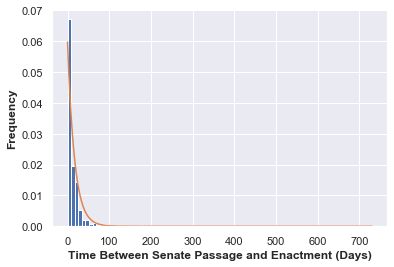

In [44]:
time_delta = (data.time_delta_3[data.time_delta_3.notna()] / np.timedelta64(1, 'D')).astype(int)
tau = 1/time_delta.mean()
time_delta.hist(bins = 50, density = True)
x = np.linspace(0,730, 730)
plt.plot(x, tau*np.exp(-tau*x))
plt.xlabel('Time Between Senate Passage and Enactment (Days)', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.show()

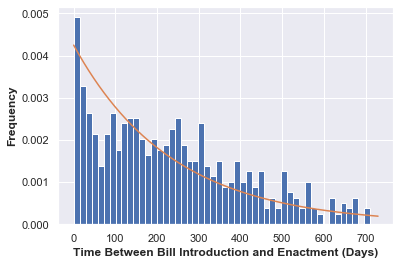

In [45]:
time_delta = (data.time_delta_total[data.time_delta_total.notna()] / np.timedelta64(1, 'D')).astype(int)
tau = 1/time_delta.mean()
time_delta.hist(bins = 50, density = True)
x = np.linspace(0,730, 730)
plt.plot(x, tau*np.exp(-tau*x))
plt.xlabel('Time Between Bill Introduction and Enactment (Days)', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.show()

The overall tim of the process from bill introduction to passage seems to be drawn from an exponential distribution as well, as we would expect since each step in the process appeared to follow and exponential distribution.

It should be noted that this information was gathered with prior knowledge about whether the bill passed the house, senate, and was enacted. Most bills do not. Therefore, we cannot use this trend to predict the probability that a bill will pass any given stage. Instead, we can say, 'If we knew the bill of interest was going to pass stage X, there is p chance that it would have passed before time t, and (1-p) chance that it will pass after time t.' To then use this to predict the probability of passage after time t, we multiply (1-p) by the probability of the bill of interest being one of the few that passes stage X. Because this set of successful bills is so small, the time shift will make comparatively little difference in a bills prospects. 

Lastly, it seems that many bills advance from introduction to enactment in only a few days. These observations will now be investigated further.

In [46]:
print('Decriptive Statistics:')
print(data.time_delta_total.describe())
print()
print('Most Frequent Values')
print(data.time_delta_total.value_counts().head(10))
print()
data[data.time_delta_total == data.time_delta_total.min()]

Decriptive Statistics:
count                         559
mean     235 days 07:48:50.232558
std      174 days 19:33:13.035969
min               1 days 00:00:00
25%              92 days 12:00:00
50%             210 days 00:00:00
75%             344 days 00:00:00
max             711 days 00:00:00
Name: time_delta_total, dtype: object

Most Frequent Values
35 days     9
7 days      6
3 days      5
286 days    5
314 days    5
9 days      4
218 days    4
244 days    4
84 days     4
92 days     4
Name: time_delta_total, dtype: int64



,bill_id,bill_slug,title,short_title,sponsor_title,sponsor_id,sponsor_name,sponsor_party,introduced_date,active,...,leadership_role,seniority,missed_votes_pct,votes_with_party_pct,votes_against_party_pct,time_delta_total,time_delta_1,time_delta_2,time_delta_3,lifespan
2666,hr3233-113,hr3233,To extend the period during which Iraqis who w...,To extend the period during which Iraqis who w...,Rep.,B000574,Earl Blumenauer,D,2013-10-02,True,...,NaN,20,4.93,94.24,5.76,1 days,0 days,NaT,NaT,2 days
3972,hr2496-114,hr2496,To extend the authorization for the replacemen...,Construction Authorization and Choice Improvem...,Rep.,C001077,Mike Coffman,R,2015-05-21,True,...,NaN,8,0.68,93.42,6.51,1 days,0 days,1 days,0 days,1 days
3672,hr3732-115,hr3732,To amend section 1113 of the Social Security A...,Emergency Aid to American Survivors of Hurrica...,Rep.,R000578,Dave Reichert,R,2017-09-11,True,...,NaN,14,3.22,91.77,8.23,1 days,0 days,NaT,NaT,1 days


The descriptive statistics and value counts above reveal that the early spike is likely a result of binning bias and the large spread of the data. Though 7 and 3 days are among the most common deltas, the value counts are 6 and 5 respectively which is not unlikely for emergency bills or short term measure.

There are only thee bills for which the time delta reads one day. Of these, the first is an extension of an existing program whose total text is less than a page. We may notice from the titles that the second is another extension. The third is an emergency hurricane relief act, which also extends an existing provision. Therefore, the early passing data represents outcomes we can expect and not an error in the data or our assumptions.

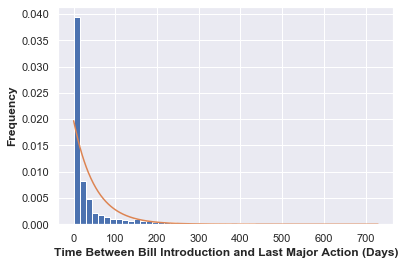

In [47]:
time_delta = (data.lifespan[data.lifespan.notna()] / np.timedelta64(1, 'D')).astype(int)
tau = 1/time_delta.mean()
time_delta.hist(bins = 50, density = True)
x = np.linspace(0,730, 730)
plt.plot(x, tau*np.exp(-tau*x))
plt.xlabel('Time Between Bill Introduction and Last Major Action (Days)', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.show()

### 5. Feature Engineering

In [48]:
#Insert the start date of the first legislative sesion for each congress
data['session_start_1'] = ''
data.loc[data.congress == 113, 'session_start_1'] = '2013-01-03'
data.loc[data.congress == 114, 'session_start_1'] = '2015-01-06'
data.loc[data.congress == 115, 'session_start_1'] = '2017-01-03'
data['session_start_1'] = pd.to_datetime(data['session_start_1'])
data['session_start_1'].unique()

array(['2013-01-03T00:00:00.000000000', '2015-01-06T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [49]:
#Insert the end date of the first legislative sesion for each congress
data['session_end_1'] = ''
data.loc[data.congress == 113, 'session_end_1'] = '2013-12-26'
data.loc[data.congress == 114, 'session_end_1'] = '2015-12-18'
data.loc[data.congress == 115, 'session_end_1'] = '2018-01-03'
data['session_end_1'] = pd.to_datetime(data['session_end_1'])
data['session_end_1'].unique()

array(['2013-12-26T00:00:00.000000000', '2015-12-18T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [50]:
#Insert the start date of the second legislative sesion for each congress
data['session_start_2'] = ''
data.loc[data.congress == 113, 'session_start_2'] = '2014-01-03'
data.loc[data.congress == 114, 'session_start_2'] = '2016-01-04'
data.loc[data.congress == 115, 'session_start_2'] = '2018-01-03'
data['session_start_2'] = pd.to_datetime(data['session_start_2'])
data['session_start_2'].unique()

array(['2014-01-03T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [51]:
#Insert the end date of the second legislative sesion for each congress
data['session_end_2'] = ''
data.loc[data.congress == 113, 'session_end_2'] = '2014-12-16'
data.loc[data.congress == 114, 'session_end_2'] = '2017-01-03'
data.loc[data.congress == 115, 'session_end_2'] = '2019-01-03'
data['session_end_2'] = pd.to_datetime(data['session_end_2'])
data['session_end_2'].unique()

array(['2014-12-16T00:00:00.000000000', '2017-01-03T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

Text(0, 0.5, 'Number of Bills')

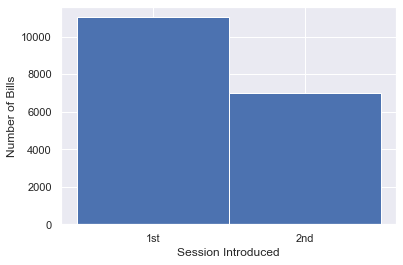

In [52]:
#Determine Which session each bill was introduced in
data['session_introduced'] = ''
session_1 = data['introduced_date'] <= data['session_end_1']
data.loc[session_1, 'session_introduced'] = 1

session_2 = (data['introduced_date'] > data['session_end_1'])
data.loc[session_2, 'session_introduced'] = 2
    
data['session_introduced'].hist(bins = 2)
plt.xlabel('Session Introduced')
plt.xticks([1.25,1.75], ['1st', '2nd'])
plt.ylabel('Number of Bills')

As we can see, about 50% more bills are introduced in the first session than in the second. We are now going to examine at what point in the session most bills are introduced, the fraction of bills which pass each session, and if any bills are passed after the end of one congress.

In [53]:
#When are most bills introduced in the session
data['introduced_frac'] = ''

frac_1 = ((data.introduced_date - data.session_start_1) / (data.session_end_1 - data.session_start_1))
frac_2 = ((data.introduced_date - data.session_start_2) / (data.session_end_2 - data.session_start_2))
session_1 = data['session_introduced'] == 1
session_2 = ~session_1

data.loc[data.session_introduced == 1, 'introduced_frac'] = frac_1[session_1].astype(float)
data.loc[data.session_introduced == 2, 'introduced_frac'] = frac_2[session_2].astype(float)
data['introduced_frac'] = data.introduced_frac.astype(float)

Text(0.5, 1.0, '2nd Session')

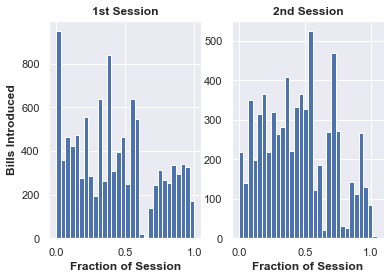

In [54]:
ax1 = plt.subplot(121)
data.loc[data.session_introduced == 1, 'introduced_frac'].hist(bins = 30)
plt.xlabel('Fraction of Session', fontweight = 'bold')
plt.ylabel('Bills Introduced', fontweight = 'bold')
plt.title('1st Session', fontweight = 'bold')

ax2 = plt.subplot(122)
data.loc[data.session_introduced == 2, 'introduced_frac'].hist(bins = 30)
plt.xlabel('Fraction of Session', fontweight = 'bold')
plt.title('2nd Session', fontweight = 'bold')


As we can see, most bills are introduced on the first day of the first session of congress. The number of bills introduced lowers as the end of the session approaches. The second session sees a spike in bills near the middle before tapering off as well. The overall lower frequency of bills during the second session may be explained by congresspeople focussing on their upcoming campaign while the spikes in each session are likely due congresspeople responding to constituents following a recess.

In [55]:
print('Overall Bills Enacted: ', data['enacted'].count())

session_1_enacted= data[data.session_introduced == 1]['enacted'].count()
session_1_introduced = data[data.session_introduced == 1]['bill_id'].count()
session_1_pct = 100* session_1_enacted / session_1_introduced
print('Bills Enacted from Session 1: ', session_1_enacted)
print('Percent Enacted from Session 1: %s%%' % np.round(session_1_pct, 2))

session_2_enacted = data[data.session_introduced == 2]['enacted'].count()
session_2_introduced = data[data.session_introduced == 2]['bill_id'].count()
session_2_pct = 100* session_2_enacted / session_2_introduced
print('Bills Enacted from Session 2: ', session_2_enacted)
print('Percent Enacted from Session 2: %s%%' % np.round(session_2_pct,2))


Overall Bills Enacted:  559
Bills Enacted from Session 1:  377
Percent Enacted from Session 1: 3.42%
Bills Enacted from Session 2:  182
Percent Enacted from Session 2: 2.61%


As we can see, there is about a 0.8% greater chance that a bill will pass during session 1 than session 2 of a congress. To confirm that this difference represents an actual shift in probability, we will conduct a quick bootstrapping test.

In [56]:
data['permutation'] = ''
np.random.seed(42)
observed_diff = session_1_pct - session_2_pct
trial_diffs = []
session_1s = []
session_2s = []
for i in range(10000):
    data['permutation'] = np.random.permutation(data.session_introduced)
    session_1_percent = 100* data[data.permutation == 1]['enacted'].count() / session_1_introduced
    session_2_percent = 100* data[data.permutation == 2]['enacted'].count() / session_2_introduced
    trial_diff = session_1_percent - session_2_percent
    trial_diffs.append(trial_diff)
    session_1s.append(session_1_percent)
    session_2s.append(session_2_percent)

7


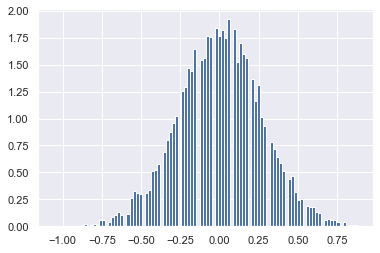

In [57]:
plt.hist(trial_diffs, bins = 100, density = True)
print(sum([i >= observed_diff for i in trial_diffs]))
data.drop(columns = 'permutation', inplace = True)

The value of 7 above indicates that out of 10,000 random permutation trials, only 7 resulted in an a difference in percentage of bills enacted at least as great as what was observed. This suggests that, had the data come from a random distribution, meaning the session the bill was introduced has no influence on a bills enactment, we would expect to see our observed difference about 0.07% of the time. This leads us to believe that this is not a good explanation for the data and that the session in which the bill is introduced has some influence on whether a bill is enacted.

In [58]:
#lastly, we look to see if any bills are enacted after the end of the current congress
print('Number of Bills Enacted After the End of the Current Congress: ', data[data.enacted > data.session_end_2]['bill_id'].count())
print('Number of Bills Passed in Senate After the End of the Current Congress: ', data[data.senate_passage > data.session_end_2]['bill_id'].count())
print('Number of Bills Passed in House After the End of the Current Congress: ', data[data.house_passage > data.session_end_2]['bill_id'].count())


Number of Bills Enacted After the End of the Current Congress:  17
Number of Bills Passed in Senate After the End of the Current Congress:  0
Number of Bills Passed in House After the End of the Current Congress:  0


Therefore, we see that while a bill may be enacted after the end of the current congress (signed by the president during their last days in office), no bill which is not passed by the current congress is ever taken up and passed by the succeeding congress in its original form. 

In [59]:
#create vote share features. 
vote_shares = pd.DataFrame({'congress': [113,113,114,114,115,115], 'sponsor_party': ['D','R','D','R','D','R'],
                           'house_vote_share': [.462, .538, .432, .568, .454, .564],
                           'senate_vote_share': [.55, .45, .46, .54, .495, .505],
                           'with_president': [1, 0, 1, 0, 0, 1]})
data = pd.merge(data,vote_shares, on = ['congress', 'sponsor_party'])

In [60]:
#create cosponsor features

#get the cosponsor column and filter out irrelevent characters
cosponsors_by_party = data.cosponsors_by_party.str.replace('[^0-9,A-Z]', '', regex = True)

#extract the cosponsor count for each party
dems = cosponsors_by_party.str.extract('(?:D)(\d+)').fillna(0).astype(int).rename(columns = {0:'D'})
reps = cosponsors_by_party.str.extract('(?:R)(\d+)').fillna(0).astype(int).rename(columns = {0:'R'})

#fixing difference between emiprical cosponsor count and the cosponsor column in the data. 
#here we assume that if the empirical count is greater than the data count, the data count is incorrect
#however, if the data count is greater than the mepirical count, then the missing values may represent unaffiliated 
#cosponsors and so we leave it as is
cosponsors_empirical = dems.D + reps.R
diff = cosponsors_empirical - data.cosponsors
diff.loc[diff <0] = 0
cosponsors = (data.cosponsors + diff)

#merge with total number of cosponsors and sponsor party
bipartisan = pd.concat([dems, reps, cosponsors, data.sponsor_party], axis = 1)
bipartisan.rename(columns = {0:'cosponsors'}, inplace = True)

#change number of sponsors in each party to fraction of total
bipartisan.loc[bipartisan.cosponsors !=0, 'D'] = bipartisan.D / bipartisan.cosponsors
bipartisan.loc[bipartisan.cosponsors !=0, 'R'] = bipartisan.R / bipartisan.cosponsors

#assign to whether sponsors are in the same party or opposite party
bipartisan['cosponsors_same_party'] = ''
bipartisan['cosponsors_opposite_party'] = ''
bipartisan.loc[bipartisan.sponsor_party == 'D', 'cosponsors_same_party'] = bipartisan.D.astype(float)
bipartisan.loc[bipartisan.sponsor_party == 'D', 'cosponsors_opposite_party'] = bipartisan.R.astype(float)
bipartisan.loc[bipartisan.sponsor_party == 'R', 'cosponsors_same_party'] = bipartisan.R.astype(float)
bipartisan.loc[bipartisan.sponsor_party == 'R', 'cosponsors_opposite_party'] = bipartisan.D.astype(float)

#add features to data
data['cosponsors_same_party'] = bipartisan['cosponsors_same_party'].astype(float)
data['cosponsors_opposite_party'] = bipartisan['cosponsors_opposite_party'].astype(float)
data['cosponsors'] = bipartisan['cosponsors'].astype(int)

In [61]:
#create committee features
#get committee codes for each bill and its sponsor and filter out irrelevant characters
data.committee_codes_x = data.committee_codes_x.str.replace('[^A-Z]',' ').str.split()
data.committee_codes_y = data.committee_codes_y.str.replace('[^A-Z]',' ').str.split()
data = data.rename(columns = {'committee_codes_x': 'committee_codes_bill', 'committee_codes_y': 'committee_codes_sponsor'})

In [62]:
#count the number of bill committees of which the sponsor is a member
#count the number of bill committees
sponsor_in_committee = []
number_bill_comittees = []
rank_in_committees = []
for index, row in data.iterrows():
    sponsor_in_committee.append(sum([(i in row.committee_codes_sponsor) for i in row.committee_codes_bill]))
    number_bill_comittees.append(len(row.committee_codes_bill))
    
data['sponsor_in_committee'] = sponsor_in_committee
data['number_bill_comittees'] = number_bill_comittees

In [63]:
#extract the list of each sponsors rank in their committees
data['committee_rank_in_party'] = data.committee_rank_in_party.str.replace('[^\d]',' ', regex = True).str.split()
committee_rank = []

#iterate over rows
for index, row in data.iterrows():
    #specify the sponsor's committees which match the bill committees
    indices = [i for i, x in enumerate(row.committee_codes_sponsor) if x in row.committee_codes_bill]
    try:
        #take the average rank of the sponsor in the relevent committees
        rank = np.mean(np.array([int(row.committee_rank_in_party[i]) for i in indices]))
    except:
        #come rank lists are missing values. In this case, impute the missing rank by taking the mean of the
        #sponsor's rank in all their committies
        rank = np.mean(np.array([int(x) for x in row.committee_rank_in_party]))
        
    committee_rank.append(rank)
    
data['committee_rank'] = committee_rank
#invert the data so that rank 1 will yield the highest value while a lesser rank like 26 yeilds a much lower value
data['committee_rank'] = 1 / data['committee_rank']
#fill in 0 for the sponsors who are not members of their bill's committee of cognizence
data['committee_rank'].fillna(0, inplace = True)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [64]:
#fill in missing values for sponsor voting patterns
data.votes_with_party_pct.fillna(data.votes_with_party_pct.median(), inplace = True)
data.missed_votes_pct.fillna(data.missed_votes_pct.median(), inplace = True)
data.votes_against_party_pct.fillna(100 - data.votes_with_party_pct - data.missed_votes_pct, inplace = True)

In [65]:
#dummy encode party, gender, and leadership role
data['republican'] = pd.get_dummies(data.sponsor_party, drop_first = True)
data['male'] = pd.get_dummies(data.gender, drop_first = True)
data['leader'] = pd.get_dummies((data.leadership_role.notnull()), drop_first = True)
data['2nd_session'] = pd.get_dummies(data.session_introduced, drop_first = True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18013 entries, 0 to 18012
Data columns (total 61 columns):
bill_id                       18013 non-null object
bill_slug                     18013 non-null object
title                         18013 non-null object
short_title                   18013 non-null object
sponsor_title                 18013 non-null object
sponsor_id                    18013 non-null object
sponsor_name                  18013 non-null object
sponsor_party                 18013 non-null object
introduced_date               18013 non-null datetime64[ns]
active                        18013 non-null bool
last_vote                     876 non-null object
house_passage                 2112 non-null datetime64[ns]
senate_passage                636 non-null datetime64[ns]
enacted                       559 non-null datetime64[ns]
vetoed                        2 non-null object
cosponsors                    18013 non-null int64
cosponsors_by_party           18013 non-n

In [67]:
data.columns

Index(['bill_id', 'bill_slug', 'title', 'short_title', 'sponsor_title',
       'sponsor_id', 'sponsor_name', 'sponsor_party', 'introduced_date',
       'active', 'last_vote', 'house_passage', 'senate_passage', 'enacted',
       'vetoed', 'cosponsors', 'cosponsors_by_party', 'committee_codes_bill',
       'subcommittee_codes_x', 'primary_subject', 'summary', 'summary_short',
       'latest_major_action_date', 'latest_major_action', 'congress',
       'committee_codes_sponsor', 'committee_side', 'committee_rank_in_party',
       'subcommittee_codes_y', 'subcommittee_side',
       'subcommittee_rank_in_party', 'id', 'gender', 'leadership_role',
       'seniority', 'missed_votes_pct', 'votes_with_party_pct',
       'votes_against_party_pct', 'time_delta_total', 'time_delta_1',
       'time_delta_2', 'time_delta_3', 'lifespan', 'session_start_1',
       'session_end_1', 'session_start_2', 'session_end_2',
       'session_introduced', 'introduced_frac', 'house_vote_share',
       'senate_vot

In [68]:
numeric_cols = ['bill_id', 'cosponsors', 'seniority', 'missed_votes_pct', 'votes_with_party_pct', 
                'votes_against_party_pct', 'introduced_frac', 'house_vote_share', 'senate_vote_share', 
                'with_president','cosponsors_same_party', 'cosponsors_opposite_party','sponsor_in_committee', 
                'number_bill_comittees', 'republican', 'male', 'leader', '2nd_session', 'committee_rank']
text_cols = ['bill_id', 'title', 'short_title', 'primary_subject', 'summary', 'summary_short']
target_cols = ['bill_id', 'active', 'house_passage', 'senate_passage', 'enacted', 'time_delta_total', 
               'time_delta_1', 'time_delta_2', 'time_delta_3', 'lifespan']

In [69]:
data_numeric = data[numeric_cols]

In [70]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18013 entries, 0 to 18012
Data columns (total 19 columns):
bill_id                      18013 non-null object
cosponsors                   18013 non-null int64
seniority                    18013 non-null int64
missed_votes_pct             18013 non-null float64
votes_with_party_pct         18013 non-null float64
votes_against_party_pct      18013 non-null float64
introduced_frac              18013 non-null float64
house_vote_share             18013 non-null float64
senate_vote_share            18013 non-null float64
with_president               18013 non-null int64
cosponsors_same_party        18013 non-null float64
cosponsors_opposite_party    18013 non-null float64
sponsor_in_committee         18013 non-null int64
number_bill_comittees        18013 non-null int64
republican                   18013 non-null uint8
male                         18013 non-null uint8
leader                       18013 non-null uint8
2nd_session             

We see all of the above columns (aside from the bill ID which acts as the index) are of a numeric type and have no missing values. This means that these variables are ready for preprocessing.

In [71]:
data_text = data[text_cols]

In [72]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18013 entries, 0 to 18012
Data columns (total 6 columns):
bill_id            18013 non-null object
title              18013 non-null object
short_title        18013 non-null object
primary_subject    17923 non-null object
summary            15916 non-null object
summary_short      15916 non-null object
dtypes: object(6)
memory usage: 985.1+ KB


Here, the title and short title all have non-null values. However, the primary_subject, summary, and summary_short columns are all missing values which will have to be accounted for if we are to use these variables to train a text based model.

In [73]:
data_target = data[target_cols]

In [74]:
data_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18013 entries, 0 to 18012
Data columns (total 10 columns):
bill_id             18013 non-null object
active              18013 non-null bool
house_passage       2112 non-null datetime64[ns]
senate_passage      636 non-null datetime64[ns]
enacted             559 non-null datetime64[ns]
time_delta_total    559 non-null timedelta64[ns]
time_delta_1        2112 non-null timedelta64[ns]
time_delta_2        619 non-null timedelta64[ns]
time_delta_3        540 non-null timedelta64[ns]
lifespan            18013 non-null timedelta64[ns]
dtypes: bool(1), datetime64[ns](3), object(1), timedelta64[ns](5)
memory usage: 1.4+ MB


The values above represent what we aim to predict with our model. However, we see that we are missing a few of our time delta variables compared to the stages of passage each one represents. Therefore, if we are to predict the probability of a bill passing at a certain time we will have to fill in these values or drop the offending observations.

Before saving our data, we will conduct a quick test to determine its predictive power.

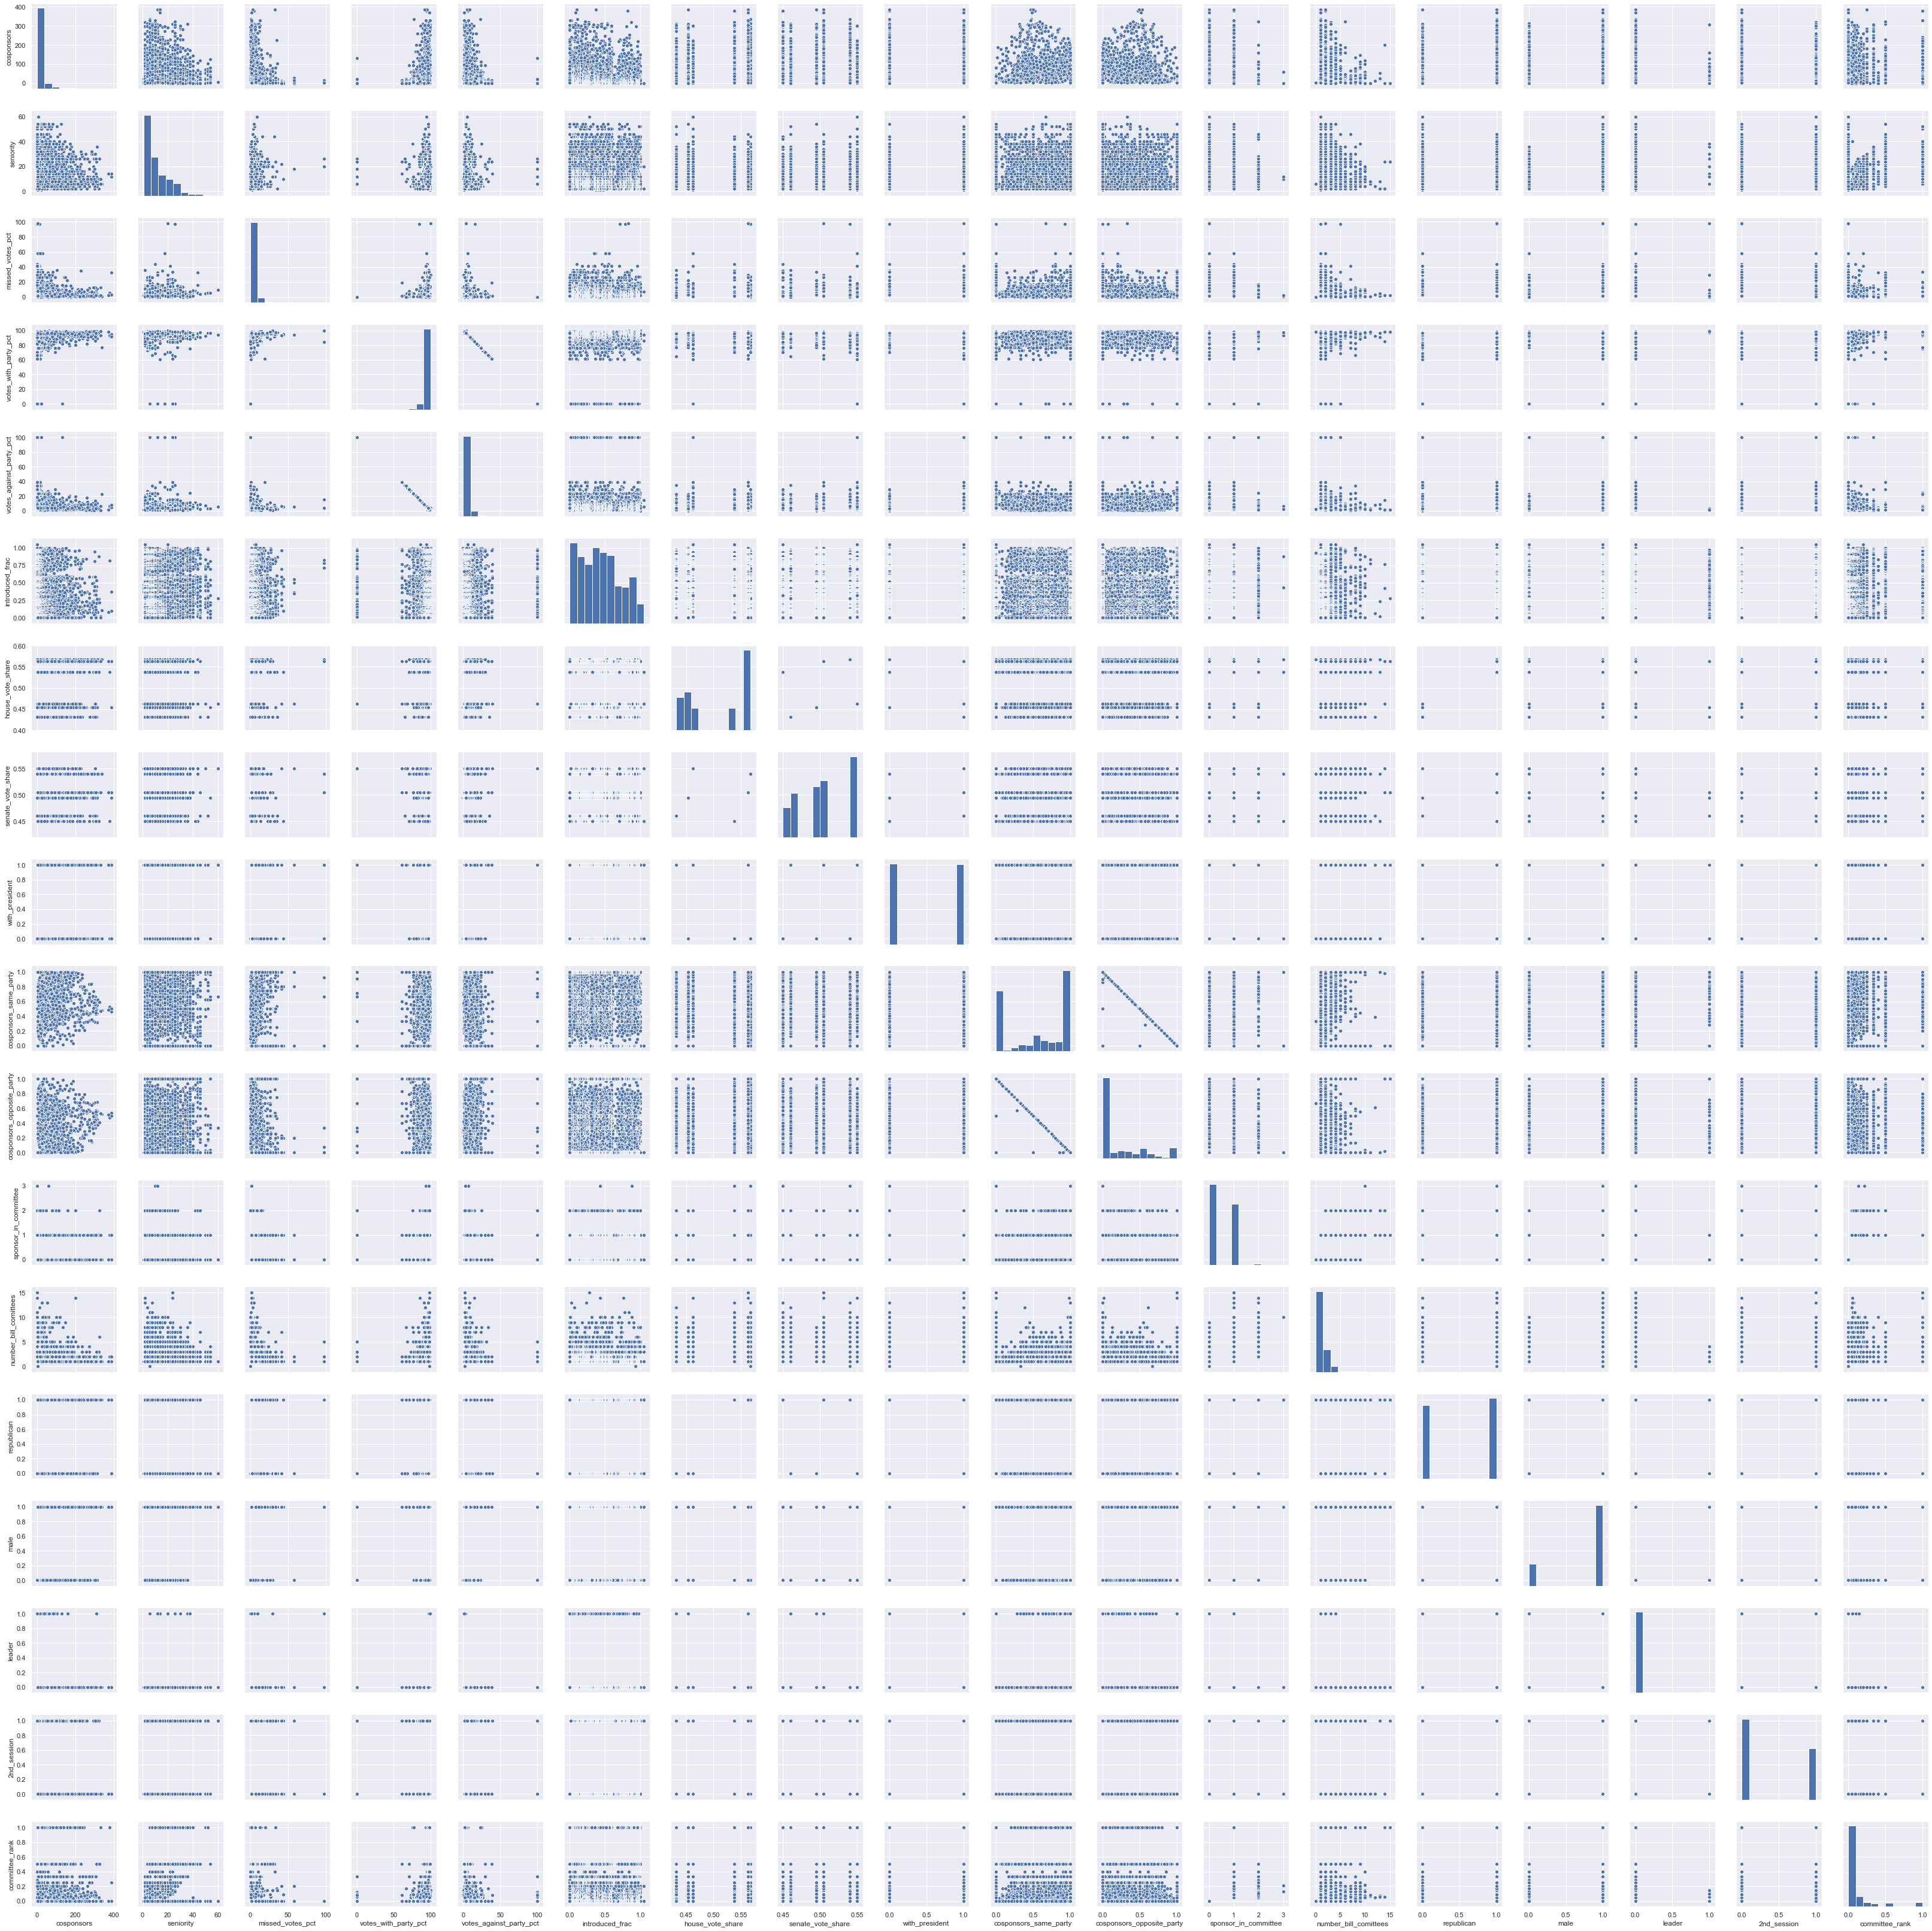

In [75]:
sns.pairplot(data_numeric)
plt.show()

The above graphic reveals that there is no observable correlation between any of our features (except for the percentage of cosponsors from each party- since these must nearly always add to 1 by definition). This lack of correlation is encouraging as it suggests that each of our features represents some unique aspect of the problem space and we will not be feeding the model redundant information, which can cause it to overweight some features.

We will now examine each features predictive power on the target variable (which for this case, we take to be whether or not a bill was enacted)

In [87]:
X = data_numeric.drop(columns = 'bill_id')
y = np.array(pd.get_dummies(data_target.enacted.notnull(), drop_first = True)).reshape(18013)
X_features = np.arange(X.shape[1])

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

Text(0.5, 1.0, 'Feature Predictive Power')

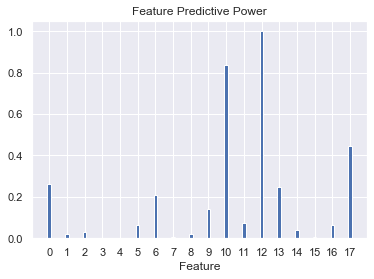

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2, random_state = 42)

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_features, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')
plt.xlabel('Feature')
plt.xticks(X_features)
plt.title('Feature Predictive Power')

According to the figure above, the top five most predictive features in determining whether or not a bill will be enacted are: 

1. The number of committees a bill is refferred to
2. The proportion of cosponsors of the opposite party
3. The average rank of the sponsor in the committees to which the bill is refferred
4. The number of cosponsors a bill has
5. The party of the sponsor

This is encouraging as it means there is some signal to be found in the data. Further, most of these features were ones which we created which means our time has been well spent. Lastly, none of the relevent features found by the algorithm could contain information which gives away the answer and so the results should be legitimate.

In [93]:
data.to_csv(r'Data/data.csv', index = False)

data_numeric.to_csv(r'Data/data_numeric.csv', index = False)

data_text.to_csv(r'Data/data_text.csv', index = False)

data_target.to_csv(r'Data/data_target.csv', index = False)